In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


In [161]:
df = pd.read_csv('training_set_fd.csv', sep = ';')
df

,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.452350,white,16161.33381,0
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.452180,white,28691.96422,0
2,4,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.181950,white,22090.94758,1
3,5,58,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.273440,other,38329.58106,1
4,6,38,M,1.0,36380,1,0,Rent,Tuesday,Highway,0,Broker,4541.387150,7.0,Medium,38060.211220,gray,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,29993,69,M,1.0,42338,1,0,Own,Saturday,Local,0,Broker,4806.841803,6.0,Medium,32144.571850,black,16868.53410,0
17994,29996,35,F,0.0,35579,1,1,Own,Monday,Local,1,Phone,4089.794471,3.0,Medium,9468.510601,blue,31500.99689,1
17995,29997,27,F,1.0,32953,0,1,Rent,Saturday,Local,2,Online,2225.803056,5.0,Medium,64974.369590,black,44536.25506,0
17996,29999,52,F,1.0,39519,1,0,Own,Friday,Highway,1,Broker,9560.744844,3.0,Compact,24983.268110,white,50093.75959,0


In [162]:
df.isnull().sum()

claim_number           0
age_of_driver          0
gender                 0
marital_status         5
annual_income          0
high_education_ind     0
address_change_ind     0
living_status          0
claim_day_of_week      0
accident_site          0
past_num_of_claims     0
channel                0
claim_est_payout      17
age_of_vehicle         8
vehicle_category       0
vehicle_price          0
vehicle_color          0
vehicle_weight         0
fraud                  0
dtype: int64

ci sono missing value

0    15182
1     2816
Name: fraud, dtype: int64

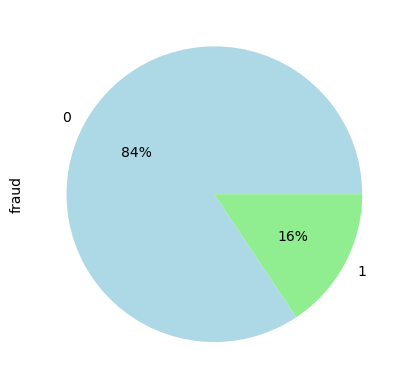

In [163]:
class_count = df['fraud'].value_counts()
class_count.plot(kind = 'pie', autopct='%1.0f%%', colors = ['lightblue', 'lightgreen'])
class_count

la classe 0 è più frequente, quindi il dataset è sbilanciato

In [164]:
df.columns

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'annual_income', 'high_education_ind', 'address_change_ind',
       'living_status', 'claim_day_of_week', 'accident_site',
       'past_num_of_claims', 'channel', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud'],
      dtype='object')

0        46
1        21
2        49
3        58
4        38
         ..
17993    69
17994    35
17995    27
17996    52
17997    61
Name: age_of_driver, Length: 17972, dtype: int64

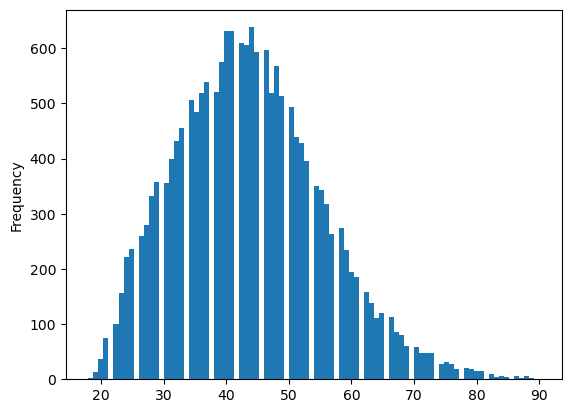

In [165]:
age_of_driver = df.loc[df['age_of_driver'] <91, 'age_of_driver']
age_of_driver.plot(kind = 'hist', bins = 90)
age_of_driver

gruppo1  18-21;  gruppo  2  22-25;  gruppo3  26-30;  gruppo  4 
41-40;  gruppo  5  41-50;  gruppo  6  51-90,

(18, 22]     225
(22, 26]     875
(26, 31]    1725
(31, 41]    5296
(41, 51]    5576
(51, 90]    4272
Name: age_of_driver, dtype: int64


<Axes: >

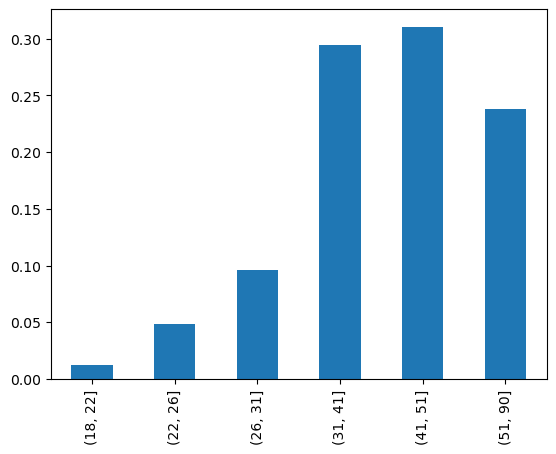

In [166]:
bins = [ 18, 22, 26, 31, 41, 51, 90]
range_eta = pd.cut(df['age_of_driver'], bins)
print(range_eta.value_counts(sort = False))
range_eta_normalized = range_eta.value_counts(sort = False, normalize = True)

range_eta_normalized.plot(kind = 'bar')




ho fatto l'istogramma già normalizzato dove si possono già vedere le percentuali

prossimo pt si fa con where

Considerare il dataset originale e considerare la divisione in uomini e donne, e all’interno di 
ogni gruppo la divisione in under o over 40 (si includano anche le persone con quaranta anni in 
questo  gruppo).  Indicare  a  quale  gruppo  occorre  fare  maggiore  attenzione  perché  è  più  facile 
avere una frode all’interno di esso (motivare la decisione) (punti 4)



In [167]:
data = pd.read_csv('training_set_fd.csv', sep = ';')
data.head(2)


,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422,0


In [168]:
# assegno 1 a tutti i age_of_driver > 39
# assegno 0 a tutti i age_of_driver < 40

# data['age_range'] = np.where(df['age_of_driver'] > 39, 'over_40', 'under_40')

# per frlo con la loc
data.loc[data['age_of_driver'] > 39, 'age_range'] = 'over'
data.loc[data['age_of_driver'] < 40, 'age_range'] = 'under'
data.head(4)



,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,age_range
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0,over
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422,0,under
2,4,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1,over
3,5,58,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1,over


<Axes: xlabel='gender', ylabel='count'>

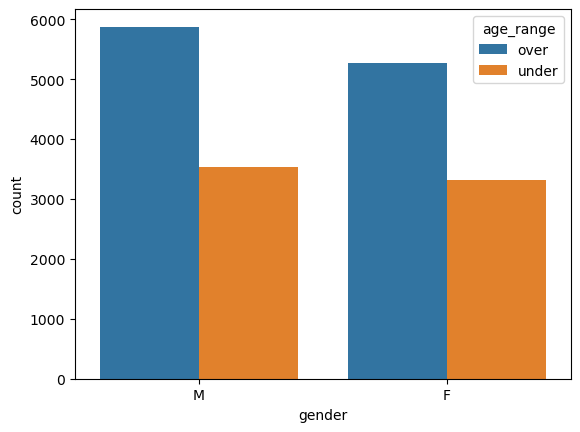

In [169]:
# raggruppo il dataset per gender e poi vedo la distribuzione di over e under 
sns.countplot(data, x = 'gender', hue='age_range')





In [170]:
#faccio un dataset di soli frodati
data_fraud = data.loc[data['fraud'] == 1]

# vedo la distribuzione di over e under per i frodati
data_gender = data_fraud.groupby('gender')['age_range'].value_counts()
data_gender



gender  age_range
F       over         895
        under        597
M       over         798
        under        526
Name: age_range, dtype: int64

In [171]:
# per vedre quanto è la percentuale di frodati over e under
# devo normalizzare: m__fordati/ m__totali, f_frodati/f_totali per over e under

age_range_per_gender = data.groupby('gender')['age_range'].value_counts()
age_range_per_gender

gender  age_range
F       over         5263
        under        3321
M       over         5875
        under        3539
Name: age_range, dtype: int64

In [173]:
age_range_per_gender_normalized = data.groupby('gender')['age_range'].value_counts(normalize=True)
age_range_per_gender_normalized


gender  age_range
F       over         0.613117
        under        0.386883
M       over         0.624071
        under        0.375929
Name: age_range, dtype: float64

<Axes: xlabel='gender,age_range'>

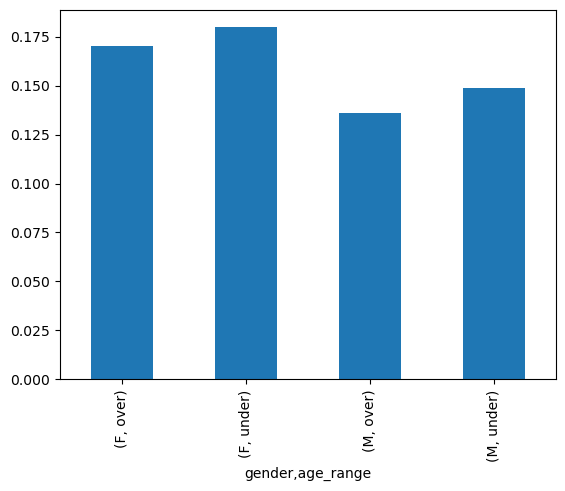

In [17]:
data_gender_percent = data_gender/age_range_per_gender
data_gender_percent.plot.bar()

4. Verificare  con  un  opportuno  diagramma  se  è  vero  che  la  distribuzione  delle  frodi  aumenta 
all’aumentare del pagamento richiesto per l’indennizzo (attributo claim_est_payout) (punti 2)

In [18]:
data.head(2)

,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,age_range
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0,over
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422,0,under


[7530.940993 2966.024895 6283.888333 ... 2225.803056 9560.744844
 5166.91527 ]


<Axes: >

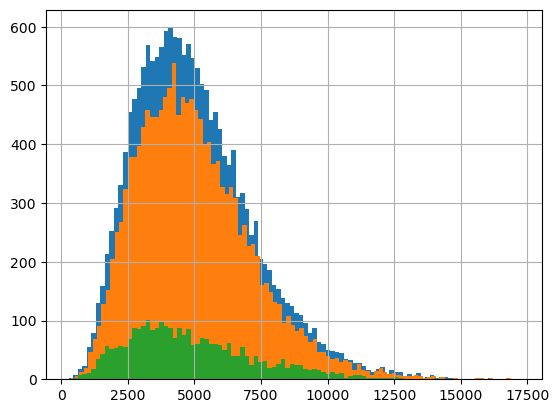

In [19]:
# per farlo stampo la distribuzione del dataset per l'attriuto claim_est_payout

print(data['claim_est_payout'].unique())
data['claim_est_payout'].hist(bins = 100)

data['claim_est_payout'].loc[data['fraud']==0].hist(bins = 100)

data['claim_est_payout'].loc[data['fraud']==1].hist(bins = 100)


## parte 2

Import necessari per la parte 2 e funzioni usate per:

- **testModel()**
- valutare un modello o la pipeline(con un modello) 
    
    
- testare piu modelli o la pipeline su piu modelli:

    - 1. fare una lista de modelli da testare es: **models = [model1, model2, model3]**
    
    - 2. for m in models: 
            testModel(m, X_train, y_train, X_test, y_test)

            

- **testModelWithConfusionMatrix()**
    - testare un modello o la pipeline con confusion matrix 


    - comparare piu modelli con confusion matrix **testModelsWithConfusionMatrix()**:


    - 1. fare una lista de modelli da testare es: **models = [model1, model2, model3]**


    
    - 2. for m in models: 
            testModelsWithConfusionMatrix(m, X_train, y_train, X_test, y_test)



 - **gridSearch()**
    - fare il grid search su modello/pipeline dei parametri 

   


- **plotConfusionMatrix()**
    - per fare il plot della confusion matrix 




- variabile **identity** che è il FunctionTransformer della funzione **identity()** 

    - serve per passare il dataset senza modifiche ad esempio ad un feature union




- ottenere le colonne numeriche e categoriche **numericalColumns()** e **categoricalColumns()**


- **categoricalToNumerical(dataframe)**

    - trasformare le colonne categoriche in numeriche di un dataframe

    

In [157]:
#trasformatori e pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
#metriche e modelli
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier



#funzione per calcolare confusion matrix e il report
def plot_confusion_matrix(confusion_matrix):
    cm = confusion_matrix
    # Calcolo dei conteggi non normalizzati
    group_counts = ["{0:0.0f}\n({1:0.2%})".format(value, value/np.sum(cm)) for value in cm.flatten()]

    # Calcolo dei conteggi normalizzati
    group_percentages = ["{0:.2%}\n({1:0.0f})".format(value, value*np.sum(cm)) for value in cm.flatten()/np.sum(cm)]

    # Trasformazione dei conteggi in una matrice 2x2
    labels = np.asarray(group_counts).reshape(2, 2)

    plot = sns.heatmap(cm, annot = labels, fmt='', cmap='Blues')
    plot.set_title('Confusion Matrix')
    plot.set_ylabel('True class')
    plot.set_xlabel('Predicted class')
    plt.show()


def gridSearch(model, param_grid, cv, X_train, y_train, X_test, y_test): #works also with pipelines
    clf = GridSearchCV(model, param_grid, cv=cv)
    clf.fit(X_train, y_train)
    print('best parameters: ', clf.best_params_)
    print('with accuracy: ', clf.best_score_)
    print()
    model.set_params(**clf.best_params_)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    print('acc sul train del modello con i parametri ottimizzati: ', acc_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('acc del modello con i parametri ottimizzati: : ', acc)
    print('--------------------------------------------------------------------')
    return model


# def compareModels(model_list, X_train, y_train, X_test, y_test):
#     for m in model_list:
#         m.fit(X_train, y_train)
#         y_pred_train = m.predict(X_train)
#         y_pred = m.predict(X_test)
#         print(m)
#         print('accuracy train: ', accuracy_score(y_train, y_pred_train))
#         print('accuracy: ', accuracy_score(y_test, y_pred))
#         cm = confusion_matrix(y_test, y_pred)
#         plot_confusion_matrix(cm)
#         print()
#         print()
#         print('classification report: ', classification_report(y_test, y_pred))

#         print('--------------------------------------------------------------------')

#prende in input un modello o una lista di modelli e fa il cross validation
def crossValidation(model,cv, X, y):
        cross_val = cross_val_score(m, X, y, cv = cv, scoring = 'accuracy') 
        print(model)
        # print()
        print('cross validation scores: ', cross_val)
        # print()
        # print('accuracy media', cross_val.mean())
        # print()
        print("Accuracy con incertezza: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))
        print('--------------------------------------------------------------------')
        return model


# allena il modello su X_train e y_train
# stampa l'accuracy sul train e sul test
def  testModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(model)
    print('accuracy train: ', accuracy_score(y_train, y_pred_train))
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('--------------------------------------------------------------------')   
    return model 

# allena il modello su X_train e y_train
# stampa l'accuracy sul train e sul test
# stampa la confusion matrix e il classification report
def testModelWithConfusionMatrix(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(model)
    print('accuracy train: ', accuracy_score(y_train, y_pred_train))
    print('accuracy: ', accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    print()
    print('--------------------------------------------------------------------')
    print('classification report: ', classification_report(y_test, y_pred))
    print('--------------------------------------------------------------------')

# input d'esempio 
# models = [LogisticRegression(solver = 'liblinear'), DecisionTreeClassifier()]
# pipeline = Pipeline(steps=[('col_trasf', col_trasf), ('scaler', scaler), ('models_list', models)])
# def testPipelineOnModels(pipeline, models_list, X_train, y_train, X_test, y_test):
#     for m in models_list:
#         print(m)
#         pipeline.fit(X_train, y_train)
#         y_pred_train = pipeline.predict(X_train)
#         y_pred = pipeline.predict(X_test)
#         print('accuracy train: ', accuracy_score(y_train, y_pred_train))
#         print('accuracy: ', accuracy_score(y_test, y_pred))
#         print()
#         print()
#         print('classification report: ', classification_report(y_test, y_pred))

#         print('--------------------------------------------------------------------')
  

# per fare il feature union fra il dataset originale e le nuove colonne da aggiungere
def identity(X):
  return X
identity = FunctionTransformer(identity, validate=True)

#trasforma le colonne categoriche in numeriche con ordinal encoder
def categoricalToNumerical(dt):
    categorical_columns = dt.select_dtypes(include=['object']).columns.tolist()
    data = dt.copy()
    oe = OrdinalEncoder()
    data[categorical_columns] = oe.fit_transform(data[categorical_columns])
    data = pd.DataFrame(data, columns = dt.columns)
    return data

# ritorna lista delle colonne categoriche di un dataframe dato in input
def categoricalColumns(dt):
    categorical_columns = dt.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns

# ritorna lista delle colonne numeriche di un dataframe dato in input
def numericalColumns(dt):
    numerical_columns = dt.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return numerical_columns


In [93]:
df = pd.read_csv('training_set_fd.csv', sep = ';')

In [94]:
df.head(2)

,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422,0


In [95]:
#elimino istanze con val nulli
df.dropna(inplace = True)
df.isnull().sum()

claim_number          0
age_of_driver         0
gender                0
marital_status        0
annual_income         0
high_education_ind    0
address_change_ind    0
living_status         0
claim_day_of_week     0
accident_site         0
past_num_of_claims    0
channel               0
claim_est_payout      0
age_of_vehicle        0
vehicle_category      0
vehicle_price         0
vehicle_color         0
vehicle_weight        0
fraud                 0
dtype: int64

In [96]:
#elimino le colonne che non mi servono, la classe 'FRAUD' e il claim_number
dt = df.drop(['fraud', 'claim_number'], axis = 1)
dt.head(3)



,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381
1,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422
2,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.18195,white,22090.94758


In [97]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17968 entries, 0 to 17997
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_of_driver       17968 non-null  int64  
 1   gender              17968 non-null  object 
 2   marital_status      17968 non-null  float64
 3   annual_income       17968 non-null  int64  
 4   high_education_ind  17968 non-null  int64  
 5   address_change_ind  17968 non-null  int64  
 6   living_status       17968 non-null  object 
 7   claim_day_of_week   17968 non-null  object 
 8   accident_site       17968 non-null  object 
 9   past_num_of_claims  17968 non-null  int64  
 10  channel             17968 non-null  object 
 11  claim_est_payout    17968 non-null  float64
 12  age_of_vehicle      17968 non-null  float64
 13  vehicle_category    17968 non-null  object 
 14  vehicle_price       17968 non-null  float64
 15  vehicle_color       17968 non-null  object 
 16  vehi

In [98]:
categorical_columns = dt.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['gender',
 'living_status',
 'claim_day_of_week',
 'accident_site',
 'channel',
 'vehicle_category',
 'vehicle_color']

In [99]:
categorical_columns = dt.select_dtypes(include=['object']).columns.tolist()
data = dt.copy()
oe = OrdinalEncoder()
data[categorical_columns] = oe.fit_transform(data[categorical_columns])
data = pd.DataFrame(data, columns = dt.columns)
data.head(4)


,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,46,1.0,1.0,38301,1,1,1.0,0.0,1.0,1,0.0,7530.940993,9.0,0.0,12885.45235,6.0,16161.33381
1,21,0.0,0.0,30445,0,1,1.0,4.0,0.0,1,1.0,2966.024895,4.0,1.0,29429.45218,6.0,28691.96422
2,49,0.0,0.0,38923,0,1,0.0,5.0,1.0,0,0.0,6283.888333,3.0,0.0,21701.18195,6.0,22090.94758
3,58,0.0,1.0,40605,1,0,0.0,4.0,1.0,3,0.0,6169.747994,4.0,2.0,13198.27344,3.0,38329.58106


In [100]:
X = data
y = df['fraud']

# controllo se ogni esempio di X ha la sua label
print(X.shape)
print(y.shape)

(17968, 17)
(17968,)


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11978, 17)
(5990, 17)
(11978,)
(5990,)


LogisticRegression(solver='liblinear')
accuracy train:  0.8428786107864418
accuracy:  0.84440734557596


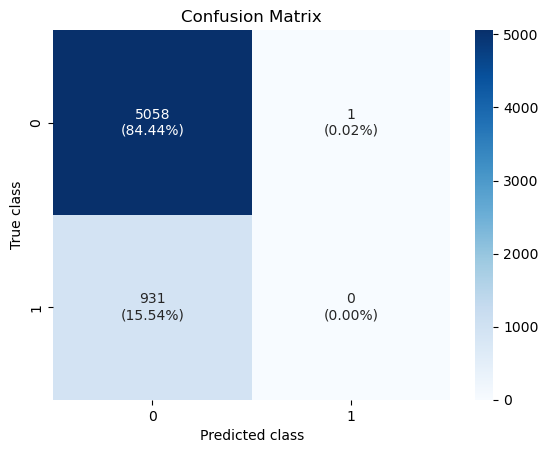


--------------------------------------------------------------------
classification report:                precision    recall  f1-score   support

           0       0.84      1.00      0.92      5059
           1       0.00      0.00      0.00       931

    accuracy                           0.84      5990
   macro avg       0.42      0.50      0.46      5990
weighted avg       0.71      0.84      0.77      5990

--------------------------------------------------------------------
DecisionTreeClassifier()
accuracy train:  1.0
accuracy:  0.730050083472454


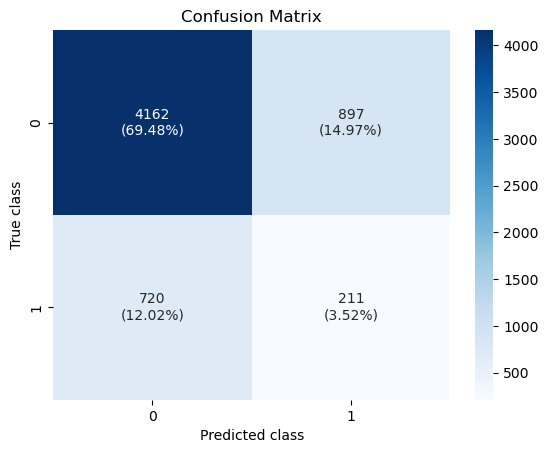


--------------------------------------------------------------------
classification report:                precision    recall  f1-score   support

           0       0.85      0.82      0.84      5059
           1       0.19      0.23      0.21       931

    accuracy                           0.73      5990
   macro avg       0.52      0.52      0.52      5990
weighted avg       0.75      0.73      0.74      5990

--------------------------------------------------------------------
DummyClassifier()
accuracy train:  0.84296209717816
accuracy:  0.8445742904841402


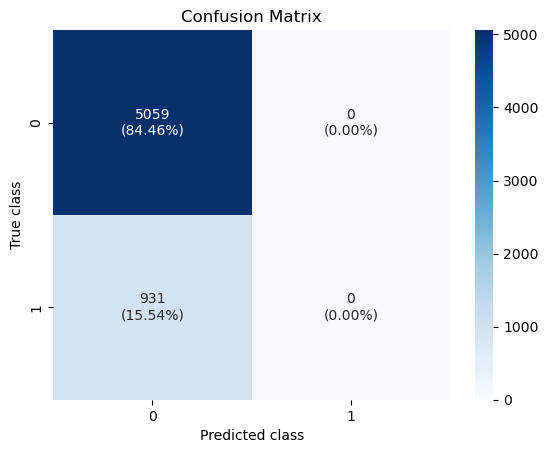


--------------------------------------------------------------------
classification report:                precision    recall  f1-score   support

           0       0.84      1.00      0.92      5059
           1       0.00      0.00      0.00       931

    accuracy                           0.84      5990
   macro avg       0.42      0.50      0.46      5990
weighted avg       0.71      0.84      0.77      5990

--------------------------------------------------------------------


c:\Users\39379\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39379\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39379\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
# def compareModels(model_list, X_train, y_train, X_test, y_test):
#     for m in model_list:
#         m.fit(X_train, y_train)
#         y_pred_train = m.predict(X_train)
#         y_pred = m.predict(X_test)
#         print(m)
#         print('accuracy train: ', accuracy_score(y_train, y_pred_train))
#         print('accuracy: ', accuracy_score(y_test, y_pred))
#         cm = confusion_matrix(y_test, y_pred)
#         plot_confusion_matrix(cm)
#         print()
#         print()
#         print('classification report: ', classification_report(y_test, y_pred))

#         print('--------------------------------------------------------------------')

model_list = [LogisticRegression(solver = 'liblinear'), DecisionTreeClassifier(), DummyClassifier()]

for m in model_list:
    testModelWithConfusionMatrix(m, X_train, y_train, X_test, y_test)
# compareModels(model_list, X_train, y_train, X_test, y_test)

In [141]:
for m in model_list:
    crossValidation(m, 5, X, y)

LogisticRegression(solver='liblinear')
cross validation scores:  [0.84362827 0.84335003 0.84307179 0.84358475 0.84330643]
Accuracy con incertezza: 0.84 (+/- 0.00)
--------------------------------------------------------------------
DecisionTreeClassifier()
cross validation scores:  [0.74485253 0.73567056 0.73622705 0.74728639 0.73698859]
Accuracy con incertezza: 0.74 (+/- 0.01)
--------------------------------------------------------------------
DummyClassifier()
cross validation scores:  [0.84362827 0.84335003 0.84335003 0.84358475 0.84358475]
Accuracy con incertezza: 0.84 (+/- 0.00)
--------------------------------------------------------------------


In [158]:
# grid search per Logistic Regression
parameters = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}

# iatanzia il modello
model = LogisticRegression()

gridSearch(model, parameters,5, X_train, y_train, X_test, y_test)


best parameters:  {'C': 0.01, 'penalty': 'l2'}
with accuracy:  0.8429621045514271

acc sul train del modello con i parametri ottimizzati:  0.8428786107864418
acc del modello con i parametri ottimizzati: :  0.84440734557596
--------------------------------------------------------------------


c:\Users\39379\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\39379\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\39379\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\39379\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

LogisticRegression(C=0.01)

4.  Introdurre  una  discretizzazione  degli  attributi  claim_est_payout  e  vehicle_price,  e 
utilizzare  la  funzione  MaxAbsScaler  per  scalare  i  valori  del  dataset  tra  0  e  1  e  confrontare  se 
l’accuratezza ottenuta con il Decision Tree Classifier e con la Logistic Regression migliora (punti 3)

In [38]:
X.head(2)

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,46,1.0,1.0,38301,1,1,1.0,0.0,1.0,1,0.0,7530.940993,9.0,0.0,12885.45235,6.0,16161.33381
1,21,0.0,0.0,30445,0,1,1.0,4.0,0.0,1,1.0,2966.024895,4.0,1.0,29429.45218,6.0,28691.96422


In [39]:
X.shape

(17968, 17)

In [142]:
# discretizzo claim_est_payout  e  vehicle_price con KBinsDiscretizer
model = [LogisticRegression(solver = 'liblinear'), DecisionTreeClassifier()]
disc = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'uniform')
scaler = MinMaxScaler( feature_range = (0, 1))

    #applico un trasformer con le due operazioni
col_trasf = ColumnTransformer([('disc', disc, ['claim_est_payout', 'vehicle_price'])], remainder = 'passthrough')
pipeline = Pipeline(steps=[('col_trasf', col_trasf), ('scaler', scaler), ('model', m)])
pipeline.fit(X_train, y_train)

for m in model:
    testModel(m, X_train, y_train, X_test, y_test)



LogisticRegression(solver='liblinear')
accuracy train:  0.8428786107864418
accuracy:  0.84440734557596
--------------------------------------------------------------------
DecisionTreeClassifier()
accuracy train:  1.0
accuracy:  0.728380634390651
--------------------------------------------------------------------


l'accuracy non migliora con la discretizzazione e la scalatura

5. Creare una pipeline in cui si aggiungano al dataset normalizzato due colonne che 
rappresentano i valori degli attributi claim_est_payout e vehicle_price discretizzati in 10 
intervalli. Si valuti se l’accuratezza migliora utilizzando LogisticRegression come modello (punti 
2).

In [144]:
# per pipeline: 
# faccio la normalizzazione con MinMaxScaler
# prima del columns trasform perchè senno perdo le colonne del dataset 
# lo ritrasformo in un dataframe perchè MinMaxScaler ritorna un array

disc = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'uniform')
scaler = MinMaxScaler( feature_range = (0, 1))
scaler.fit(X)
X_norm = scaler.transform(X)
X = pd.DataFrame(X_norm, columns = X.columns)
X.head(2)


,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,0.132701,1.0,1.0,0.704936,1.0,1.0,1.0,0.000000,0.5,0.166667,0.0,0.427989,0.5625,0.0,0.083689,1.0,0.113875
1,0.014218,0.0,0.0,0.560349,0.0,1.0,1.0,0.666667,0.0,0.166667,0.5,0.158445,0.2500,0.5,0.216459,1.0,0.217789


In [145]:
# faccio columns trasform per ottenere le due colonne discretizzate con KBinsDiscretizer
# faccio il feature union del dt scalato e le due colonn discretizzate
# applico il modello

#senza passtrough perchè voglio ottenere solo due colonne da unire al dataset scalato
col_trasf = ColumnTransformer(transformers=[('disc', disc, ['claim_est_payout', 'vehicle_price'])]) 
# unisco le due colonne discretizzate al dataset (il minmax scaler è il primo step della pipeline)
combined_features = FeatureUnion([('col_trasf', col_trasf),
                                   ('original', 'passthrough')]) # 

pipeline = Pipeline(steps=[('FeatureUnion', combined_features), 
                            ('model', LogisticRegression(solver = 'liblinear'))])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('FeatureUnion',
                 FeatureUnion(transformer_list=[('col_trasf',
                                                 ColumnTransformer(transformers=[('disc',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   n_bins=10,
                                                                                                   strategy='uniform'),
                                                                                  ['claim_est_payout',
                                                                                   'vehicle_price'])])),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('model', LogisticRegression(solver='liblinear'))])

In [146]:
y_pred = pipeline.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred))

accuracy:  0.84440734557596


6. Aggiungere alla pipeline la funzione SelectKBest (https://scikit-
learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selec
tkbest#sklearn.feature_selection.SelectKBest). Utilizzare la funzione di gridSearchCV per 
selezionare il K migliore e anche gli intervalli migliori in cui discretizzare i valori di 
claim_est_payout e vehicle_price (punti 3).

In [147]:
kbest = SelectKBest()
extended_pipeline = Pipeline(steps=[('FeatureUnion', combined_features),
                                    ('kbest', kbest),
                                    ('model', LogisticRegression(solver = 'liblinear'))])

                                    

In [148]:
#GRID SEARCH SU PIPELINE
pipeline = extended_pipeline
# definisco i parametri da ottimizzare, ne metto un per il modello
# e uno per lo step di discretizzazione della pipeline
param_grid = { 
    'FeatureUnion__col_trasf__disc__n_bins': [ 4, 6, 10],
    'kbest__k': [ 5, 10, 15]
}

gridSearch(pipeline, param_grid, 5, X_train, y_train, X_test, y_test)

best parameters:  {'FeatureUnion__col_trasf__disc__n_bins': 4, 'kbest__k': 5}
with accuracy:  0.8431290843124065

acc sul train del modello con i parametri ottimizzati:  0.84296209717816
acc del modello con i parametri ottimizzati: :  0.8432387312186979


Pipeline(steps=[('FeatureUnion',
                 FeatureUnion(transformer_list=[('col_trasf',
                                                 ColumnTransformer(transformers=[('disc',
                                                                                  KBinsDiscretizer(encode='ordinal',
                                                                                                   n_bins=4,
                                                                                                   strategy='uniform'),
                                                                                  ['claim_est_payout',
                                                                                   'vehicle_price'])])),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('kbest', SelectKBest(k=5)),
                ('model', LogisticRegression(solver='liblinear'))])

 
7. Creare una nuova pipeline che applichi un simpleImputer (anziché la rimozione delle righe), al 
dataset iniziale. Si aggiunga questa pipeline a quella del punto 6 e si valuti la strategia migliore 
tra mean, median e most frequent (si decida una configurazione qualsiasi per gli altri 
parametri.(punti 3). 
 
 
 


In [149]:
new_df = pd.read_csv('training_set_fd.csv', sep=';')
new_df.head(2)
new_df.isnull().sum()



claim_number           0
age_of_driver          0
gender                 0
marital_status         5
annual_income          0
high_education_ind     0
address_change_ind     0
living_status          0
claim_day_of_week      0
accident_site          0
past_num_of_claims     0
channel                0
claim_est_payout      17
age_of_vehicle         8
vehicle_category       0
vehicle_price          0
vehicle_color          0
vehicle_weight         0
fraud                  0
dtype: int64

In [150]:
new_dt = new_df.drop(['fraud', 'claim_number'], axis = 1)
new_dt.head(2)

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381
1,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422


In [151]:
data = categoricalToNumerical(new_dt)
data.head(2)


,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
0,46,1.0,1.0,38301,1,1,1.0,0.0,1.0,1,0.0,7530.940993,9.0,0.0,12885.45235,6.0,16161.33381
1,21,0.0,0.0,30445,0,1,1.0,4.0,0.0,1,1.0,2966.024895,4.0,1.0,29429.45218,6.0,28691.96422


In [52]:
data.isnull().sum()

age_of_driver          0
gender                 0
marital_status         5
annual_income          0
high_education_ind     0
address_change_ind     0
living_status          0
claim_day_of_week      0
accident_site          0
past_num_of_claims     0
channel                0
claim_est_payout      17
age_of_vehicle         8
vehicle_category       0
vehicle_price          0
vehicle_color          0
vehicle_weight         0
dtype: int64

In [69]:
X = data
y = new_df['fraud']
print(X.shape)
print(y.shape)


(17998, 17)
(17998,)


In [70]:
X.isnull().sum().sum()

30

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train.head(2)

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight
15760,49,0.0,1.0,38936,1,1,0.0,1.0,2.0,0,0.0,5144.890342,4.0,1.0,30363.26998,6.0,17459.74728
7302,43,1.0,1.0,37607,1,1,1.0,0.0,1.0,1,0.0,4247.938548,8.0,1.0,38001.60959,1.0,34122.51191


In [73]:
#controllo se l'OrdinalEncoder ha lasciato i valori nulli
X_train.isnull().sum().sum()

21

per usare il column trasformer dopo un altro trasformer, le colonne da farli trasformare devo pasasrgliere tramite l'indice della colonna desisderata e non il nome, perchè dal simple imputer esce un array e non un dataframe

In [83]:
#vedo gli indici delle colonne da passare al column trasformer
take_columns = [X_train.columns.get_loc('claim_est_payout'), X_train.columns.get_loc('vehicle_price')]

In [153]:

discretizer = ColumnTransformer(transformers=[('disc', KBinsDiscretizer(n_bins=10, encode= "ordinal", strategy= "uniform"), take_columns)]) 
# unisco le due colonne discretizzate al dataset (il minmax scaler è il primo step della pipeline)
combined_features = FeatureUnion([('col_trasf', discretizer),
                                   ('original', 'passthrough')]) 




In [156]:
extended_pipeline = Pipeline(steps=[('column trasform', combined_features),
                                    ('Selectkbest', SelectKBest()),
                                    ('model', LogisticRegression(solver = 'liblinear'))])



pipeline = Pipeline(steps=[('imputer', SimpleImputer()),
                           ('old_pipeline', extended_pipeline)]) 
                            
param_grid = {
    'imputer__strategy': ["mean", "median", "most_frequent"]
}

gridSearch(pipeline, param_grid, 5, X_train, y_train, X_test, y_test)



best parameters:  {'imputer__strategy': 'mean'}
with accuracy:  0.8422105736422221

acc sul train del modello con i parametri ottimizzati:  0.8422107196526966
acc del modello con i parametri ottimizzati: :  0.843906510851419


Pipeline(steps=[('imputer', SimpleImputer()),
                ('old_pipeline',
                 Pipeline(steps=[('column trasform',
                                  FeatureUnion(transformer_list=[('col_trasf',
                                                                  ColumnTransformer(transformers=[('disc',
                                                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                                                    n_bins=10,
                                                                                                                    strategy='uniform'),
                                                                                                   [11,
                                                                                                    14])])),
                                                                 ('original',
                                                                  FunctionTransformer(feature_names_out='one-to-one'))])),
                                 ('Selectkbest', SelectKBest()),
                                 ('model',
                                  LogisticRegression(solver='liblinear'))]))])